### Practice Dataset

In [1]:
import os
os.chdir("C:/Users/Pooja Kathe/Downloads")
import pandas as pd

mm=pd.read_csv("monthly_milk_production.csv",index_col="Date",parse_dates=True)

In [2]:
mm.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [3]:
mm.tail()

,Production
Date,
1975-08-01,858
1975-09-01,817
1975-10-01,827
1975-11-01,797
1975-12-01,843


In [4]:
mm.isna().sum()

Production    0
dtype: int64

In [5]:
mm.shape

(168, 1)

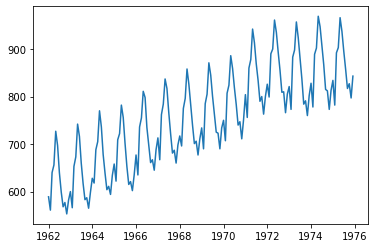

In [25]:
plt.plot(mm);               ## mean is incresing by time so our time series is not stationry 

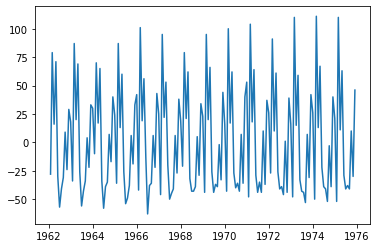

In [26]:
plt.plot(mm.diff())

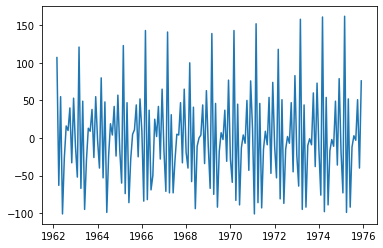

In [27]:
plt.plot(mm.diff().diff())                           ## d=2

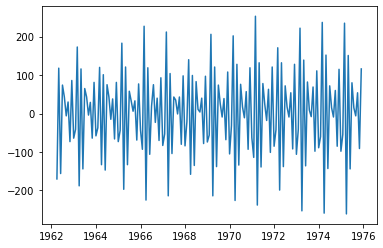

In [28]:
plt.plot(mm.diff().diff().diff())                    ##3rd level of differcing our data like stationry d=3

In [29]:
from statsmodels.tsa.stattools import acf,pacf                       ## by ACF and PACF we find values od p,q. 
from statsmodels.tsa.arima_model import ARIMA

In [30]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

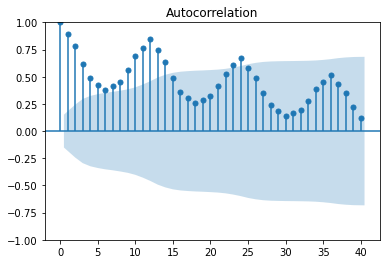

In [31]:
plot_acf(mm.Production,lags=40);

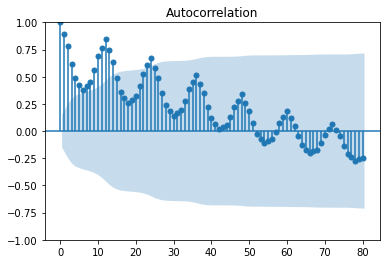

In [33]:
plot_acf(mm.Production,lags=80);

C:\Users\Pooja Kathe\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


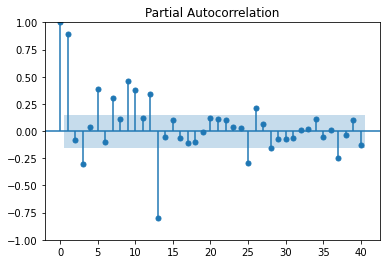

In [32]:
plot_pacf(mm.Production,lags=40);

In [ ]:
# In PACF after lag 2 there is sudden decline so the value of P is 2
# In ACF there is no sudden decline so the value of q is 0

In [35]:
model=ARIMA(mm,order=(2,3,0))
result=model.fit()

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


### by using SARIMA

In [6]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [7]:
from statsmodels.tsa.seasonal  import seasonal_decompose
import pmdarima

from pmdarima import auto_arima

In [8]:
import numpy as np

In [9]:
result=seasonal_decompose(mm)

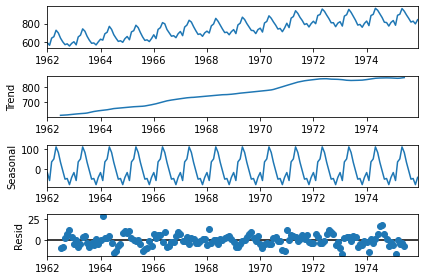

In [10]:
result.plot();

In [11]:
auto_arima(mm,seasonal=True,m=12)

ARIMA(order=(2, 0, 0), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True)

In [12]:
model_sarima=SARIMAX(mm,order=(2, 0, 0),seasonal_order=(0, 1, 1, 12))
result=model_sarima.fit()

C:\Users\Pooja Kathe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Pooja Kathe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [13]:
result.predict()

1962-01-01      0.000000
1962-02-01      0.367057
1962-03-01      0.703782
1962-04-01      1.075202
1962-05-01      1.441042
                 ...    
1975-08-01    855.164701
1975-09-01    808.298629
1975-10-01    817.173928
1975-11-01    788.422469
1975-12-01    835.204921
Freq: MS, Name: predicted_mean, Length: 168, dtype: float64

In [14]:
pred=result.predict(start=156,end=167)    ## last 1 year sesult 1975

In [15]:
pred

1975-01-01    838.109283
1975-02-01    790.347178
1975-03-01    888.306565
1975-04-01    904.958905
1975-05-01    966.831119
1975-06-01    939.484006
1975-07-01    895.907282
1975-08-01    855.164701
1975-09-01    808.298629
1975-10-01    817.173928
1975-11-01    788.422469
1975-12-01    835.204921
Freq: MS, Name: predicted_mean, dtype: float64

In [16]:
import matplotlib.pyplot as plt

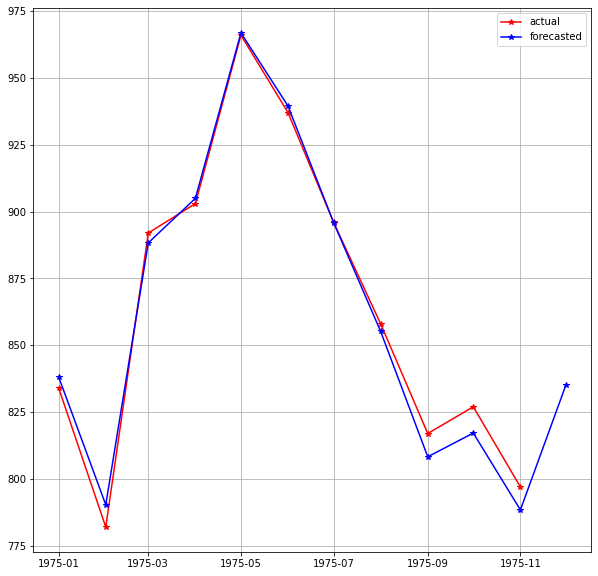

In [17]:
plt.figure(figsize=(10,10))
plt.plot(mm[156:167],marker="*",color="r",label="actual")
plt.plot(pred,color="b",label="forecasted",marker="*")
plt.legend()
plt.grid()

In [18]:
## MSC
error=mm.Production[156:167] -pred

In [19]:
MSE=np.mean(np.square(error))  ## this MSE for sarima
MSE    

33.162590741943696

In [20]:
rmse=np.sqrt(MSE)

In [21]:
rmse

5.758696965628917

In [22]:
pred_fur=result.predict(start=167,end=179)    ## last 1 year sesult 1976

In [23]:
pred_fur  

1975-12-01    835.204921
1976-01-01    864.953368
1976-02-01    817.625362
1976-03-01    924.032568
1976-04-01    936.779124
1976-05-01    999.632243
1976-06-01    971.923223
1976-07-01    930.300543
1976-08-01    890.422141
1976-09-01    844.231873
1976-10-01    849.127501
1976-11-01    814.812278
1976-12-01    856.837157
Freq: MS, Name: predicted_mean, dtype: float64

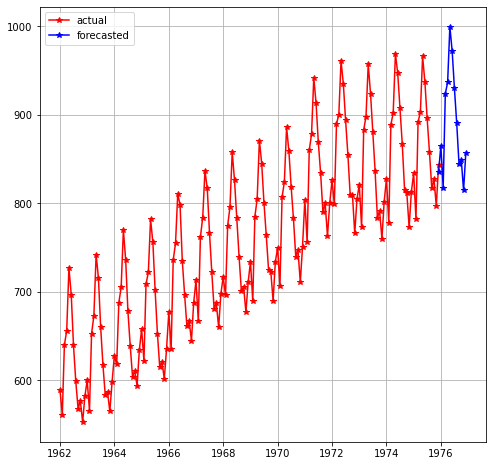

In [24]:
plt.figure(figsize=(8,8))
plt.plot(mm,marker="*",color="r",label="actual")
plt.plot(pred_fur,color="b",label="forecasted",marker="*")
plt.legend()
plt.grid()

### dataset2

In [41]:
bw=pd.read_csv("BeerWineLiquor.csv",index_col="date",parse_dates=True)

In [42]:
bw.head()

,beer
date,
1992-01-01,1509
1992-02-01,1541
1992-03-01,1597
1992-04-01,1675
1992-05-01,1822


In [43]:
bw.tail(12)

,beer
date,
2018-01-01,3965
2018-02-01,3967
2018-03-01,4629
2018-04-01,4317
2018-05-01,4897
2018-06-01,4939
2018-07-01,4963
2018-08-01,4898
2018-09-01,4598


In [44]:
bw.shape

(324, 1)

In [45]:
bw.isna().sum()

beer    0
dtype: int64

In [51]:
result=seasonal_decompose(bw)

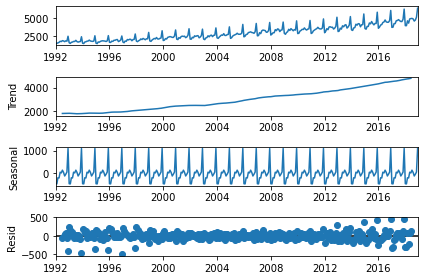

In [53]:
result.plot();

In [65]:
auto_arima(bw,seasonal=True,m=12)

ARIMA(order=(4, 1, 3), scoring_args={}, seasonal_order=(2, 1, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [66]:
model_sarima=SARIMAX(bw,order=(4,1,3),seasonal_order=(2, 1, 1, 12))
result=model_sarima.fit()

C:\Users\Pooja Kathe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Pooja Kathe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Pooja Kathe\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [67]:
result.predict()

1992-01-01       0.000000
1992-02-01    1502.370334
1992-03-01    1541.400649
1992-04-01    1598.787806
1992-05-01    1671.955157
                 ...     
2018-08-01    4937.650814
2018-09-01    4702.347217
2018-10-01    4700.598406
2018-11-01    5055.037573
2018-12-01    6384.812735
Freq: MS, Name: predicted_mean, Length: 324, dtype: float64

In [68]:
pred=result.predict(start=312,end=323)    ## last 1 year sesult 1975

In [69]:
pred

2018-01-01    3884.924223
2018-02-01    4054.914143
2018-03-01    4424.913477
2018-04-01    4421.937323
2018-05-01    4931.919978
2018-06-01    4805.411511
2018-07-01    5020.636067
2018-08-01    4937.650814
2018-09-01    4702.347217
2018-10-01    4700.598406
2018-11-01    5055.037573
2018-12-01    6384.812735
Freq: MS, Name: predicted_mean, dtype: float64

In [70]:
import matplotlib.pyplot as plt

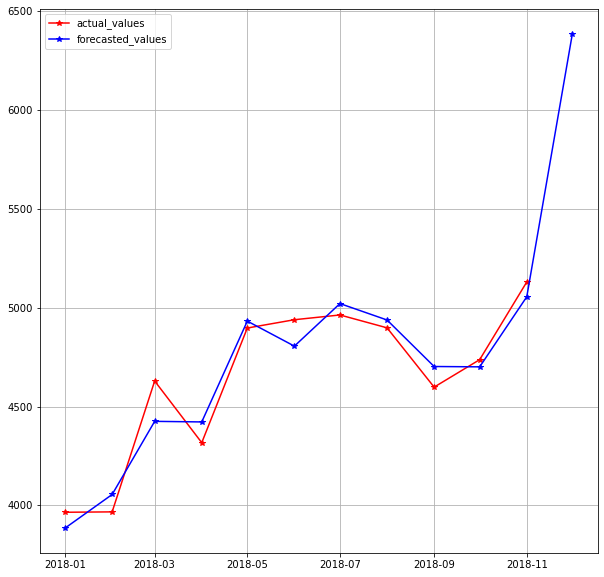

In [73]:
plt.figure(figsize=(10,10))
plt.plot(bw[312:323],marker="*",color="r",label="actual_values")
plt.plot(pred,color="b",label="forecasted_values",marker="*")
plt.legend()
plt.grid()

In [75]:
## MSC
error=bw.beer[312:323] -pred

In [76]:
MSE=np.mean(np.square(error))  ## this MSE for sarima
MSE    

9872.395722616084

In [77]:
pred_fur=result.predict(start=323,end=335)  

In [78]:
pred_fur

2018-12-01    6384.812735
2019-01-01    4152.273886
2019-02-01    4219.997032
2019-03-01    4713.975745
2019-04-01    4563.621607
2019-05-01    5110.979860
2019-06-01    5053.552340
2019-07-01    5196.755092
2019-08-01    5100.366912
2019-09-01    4765.560547
2019-10-01    4978.181188
2019-11-01    5311.250072
2019-12-01    6523.680979
Freq: MS, Name: predicted_mean, dtype: float64

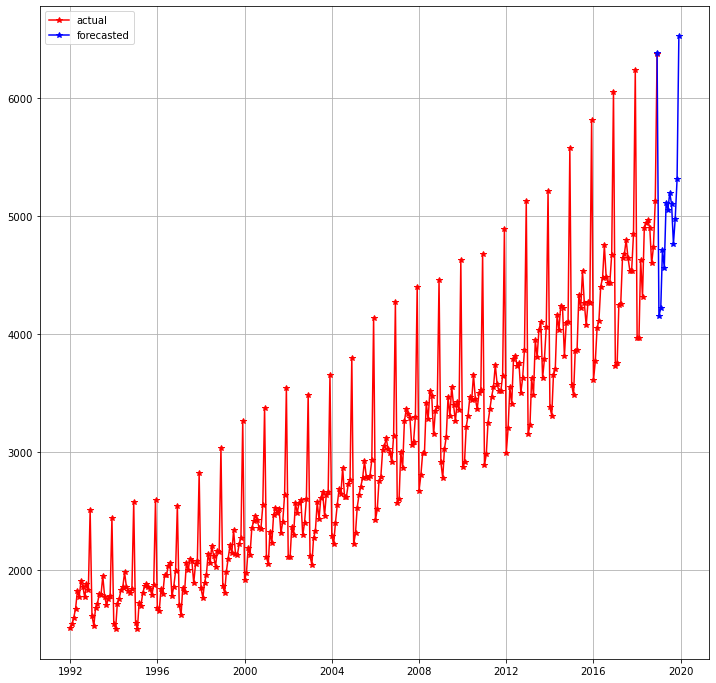

In [80]:
plt.figure(figsize=(12,12))
plt.plot(bw,marker="*",color="r",label="actual")
plt.plot(pred_fur,color="b",label="forecasted",marker="*")
plt.legend()
plt.grid()

### dataset3

In [88]:
ass=pd.read_csv("Alcohol_Sales.csv",index_col="DATE",parse_dates=True)

In [89]:
ass.head()

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [90]:
ass.tail(12)

,S4248SM144NCEN
DATE,
2018-02-01,10415
2018-03-01,12683
2018-04-01,11919
2018-05-01,14138
2018-06-01,14583
2018-07-01,12640
2018-08-01,14257
2018-09-01,12396
2018-10-01,13914


In [91]:
ass.isna().sum()

S4248SM144NCEN    0
dtype: int64

In [92]:
ass.shape

(325, 1)

In [93]:
result=seasonal_decompose(ass)

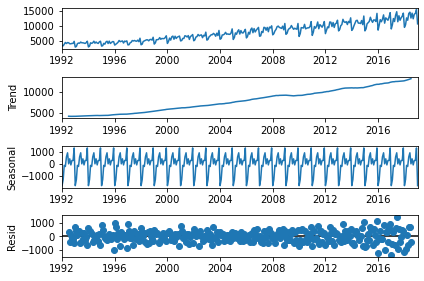

In [94]:
result.plot();

In [95]:
auto_arima(ass,seasonal=True,m=12)

ARIMA(order=(3, 1, 2), scoring_args={}, seasonal_order=(2, 1, 2, 12),
      suppress_warnings=True, with_intercept=False)

In [96]:
model_sarima=SARIMAX(ass,order=(3,1,2),seasonal_order=(2, 1, 2, 12))
result=model_sarima.fit()

C:\Users\Pooja Kathe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Pooja Kathe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Pooja Kathe\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Pooja Kathe\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Pooja Kathe\anaconda3\lib\site-packages\

In [97]:
result.predict()

1992-01-01        0.000000
1992-02-01     3267.055919
1992-03-01     3399.801224
1992-04-01     4043.069686
1992-05-01     4439.349611
                  ...     
2018-09-01    12428.706814
2018-10-01    13776.559067
2018-11-01    13563.201651
2018-12-01    14999.863765
2019-01-01    10687.524278
Freq: MS, Name: predicted_mean, Length: 325, dtype: float64

In [102]:
pred=result.predict(start=312,end=324)    ## last 1 year sesult

In [103]:
pred

2018-01-01     9892.192487
2018-02-01    10657.609547
2018-03-01    12218.736070
2018-04-01    11987.350901
2018-05-01    14160.846941
2018-06-01    14651.164543
2018-07-01    12322.270454
2018-08-01    13698.207000
2018-09-01    12428.706814
2018-10-01    13776.559067
2018-11-01    13563.201651
2018-12-01    14999.863765
2019-01-01    10687.524278
Freq: MS, Name: predicted_mean, dtype: float64

In [104]:
import matplotlib.pyplot as plt

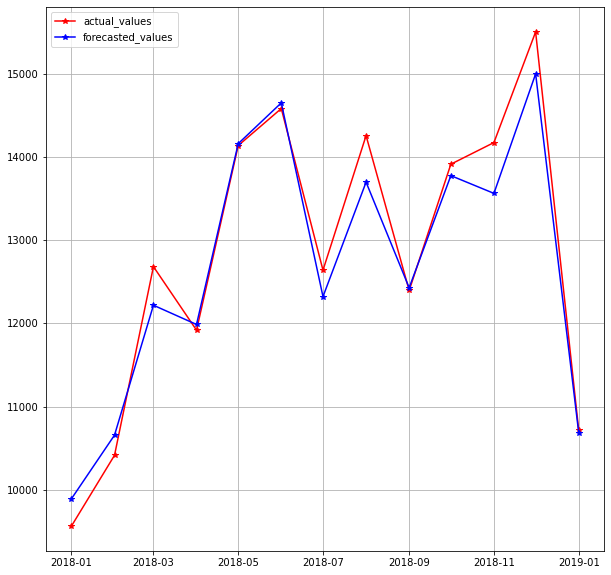

In [111]:
plt.figure(figsize=(10,10))
plt.plot(ass[312:325],marker="*",color="r",label="actual_values")
plt.plot(pred,color="b",label="forecasted_values",marker="*")
plt.legend()
plt.grid()

In [112]:
## MSC
error=ass.S4248SM144NCEN[312:324] -pred

In [113]:
MSE=np.mean(np.square(error))  ## this MSE for sarima
MSE    

121028.36037365808

In [114]:
pred_fur=result.predict(start=324,end=336)

In [115]:
pred_fur

2019-01-01    10687.524278
2019-02-01    11409.216471
2019-03-01    13155.646731
2019-04-01    13008.161612
2019-05-01    14744.773439
2019-06-01    15006.560105
2019-07-01    13788.833899
2019-08-01    14515.140212
2019-09-01    13513.974286
2019-10-01    14786.585183
2019-11-01    14387.967501
2019-12-01    16425.089300
2020-01-01    11344.264590
Freq: MS, Name: predicted_mean, dtype: float64

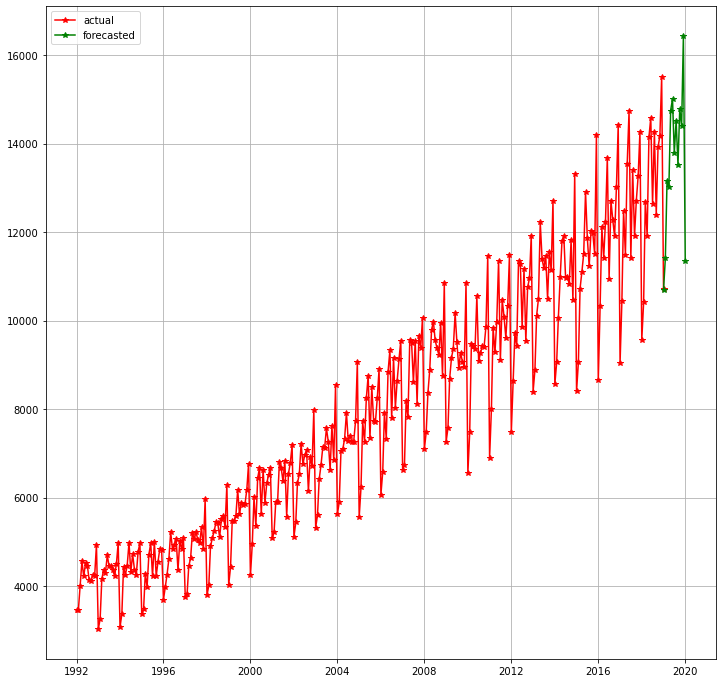

In [116]:
plt.figure(figsize=(12,12))
plt.plot(ass,marker="*",color="r",label="actual")
plt.plot(pred_fur,color="g",label="forecasted",marker="*")
plt.legend()
plt.grid()

### dataset4

In [118]:
he=pd.read_csv("HospitalityEmployees.csv",index_col="Date",parse_dates=True)

In [119]:
he.head()

,Employees
Date,
1990-01-01,1064.5
1990-02-01,1074.5
1990-03-01,1090.0
1990-04-01,1097.4
1990-05-01,1108.7


In [121]:
he.tail()

,Employees
Date,
2018-08-01,2019.1
2018-09-01,1992.5
2018-10-01,1984.3
2018-11-01,1990.1
2018-12-01,2000.2


In [122]:
he.shape

(348, 1)

In [123]:
he.isna().sum()

Employees    0
dtype: int64

In [124]:
he.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 348 entries, 1990-01-01 to 2018-12-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Employees  348 non-null    float64
dtypes: float64(1)
memory usage: 5.4 KB


In [125]:
result=seasonal_decompose(he)

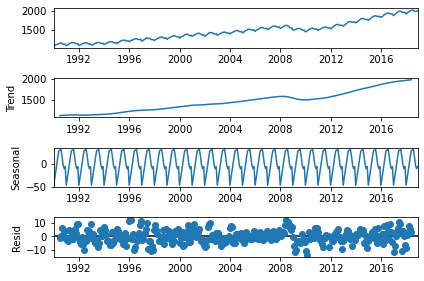

In [126]:
result.plot();

In [128]:
auto_arima(he,seasonal=True,m=12)

C:\Users\Pooja Kathe\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:522: ModelFitWarning: Error fitting  ARIMA(2,1,1)(1,0,1)[12] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "C:\Users\Pooja Kathe\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py", line 506, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "C:\Users\Pooja Kathe\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 597, in fit
    self._fit(y, X, **fit_args)
  File "C:\Users\Pooja Kathe\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 518, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "C:\Users\Pooja Kathe\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 508, in _fit_wrapper
    return arima, arima.fit(start_params=start_params,
  File "C:\Users\Pooja Kathe\anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py", line 704, in fit
    mlefit = 

ARIMA(order=(1, 1, 2), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [129]:
model_sarima=SARIMAX(he,order=(1,1,2),seasonal_order=(1, 0, 1, 12))
result=model_sarima.fit()

C:\Users\Pooja Kathe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Pooja Kathe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Pooja Kathe\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Pooja Kathe\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Pooja Kathe\anaconda3\lib\site-packages\

In [130]:
result.predict()

1990-01-01       0.000000
1990-02-01    1064.615405
1990-03-01    1076.950509
1990-04-01    1095.533952
1990-05-01    1104.374322
                 ...     
2018-08-01    2023.525954
2018-09-01    2000.317775
2018-10-01    1986.729694
2018-11-01    1974.579165
2018-12-01    1991.717742
Freq: MS, Name: predicted_mean, Length: 348, dtype: float64

In [132]:
pred=result.predict(start=336,end=347)    ## last 1 year sesult

In [133]:
pred

2018-01-01    1922.287909
2018-02-01    1936.560883
2018-03-01    1961.818117
2018-04-01    1985.941438
2018-05-01    2005.007543
2018-06-01    2018.338290
2018-07-01    2022.071194
2018-08-01    2023.525954
2018-09-01    2000.317775
2018-10-01    1986.729694
2018-11-01    1974.579165
2018-12-01    1991.717742
Freq: MS, Name: predicted_mean, dtype: float64

In [134]:
import matplotlib.pyplot as plt

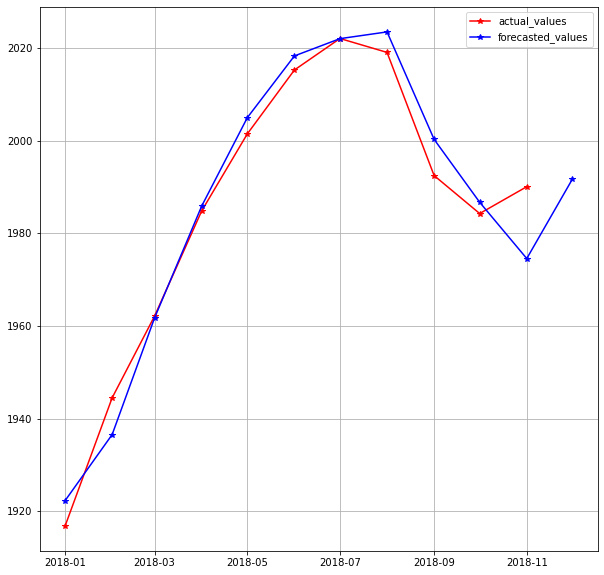

In [137]:
plt.figure(figsize=(10,10))
plt.plot(he[336:347],marker="*",color="r",label="actual_values")
plt.plot(pred,color="b",label="forecasted_values",marker="*")
plt.legend()
plt.grid()

In [138]:
## MSC
error=he.Employees[336:347] -pred

In [139]:
MSE=np.mean(np.square(error))  ## this MSE for sarima
MSE

40.310770319012256

In [140]:
pred_fur=result.predict(start=336,end=347)  

In [141]:
pred_fur

2018-01-01    1922.287909
2018-02-01    1936.560883
2018-03-01    1961.818117
2018-04-01    1985.941438
2018-05-01    2005.007543
2018-06-01    2018.338290
2018-07-01    2022.071194
2018-08-01    2023.525954
2018-09-01    2000.317775
2018-10-01    1986.729694
2018-11-01    1974.579165
2018-12-01    1991.717742
Freq: MS, Name: predicted_mean, dtype: float64

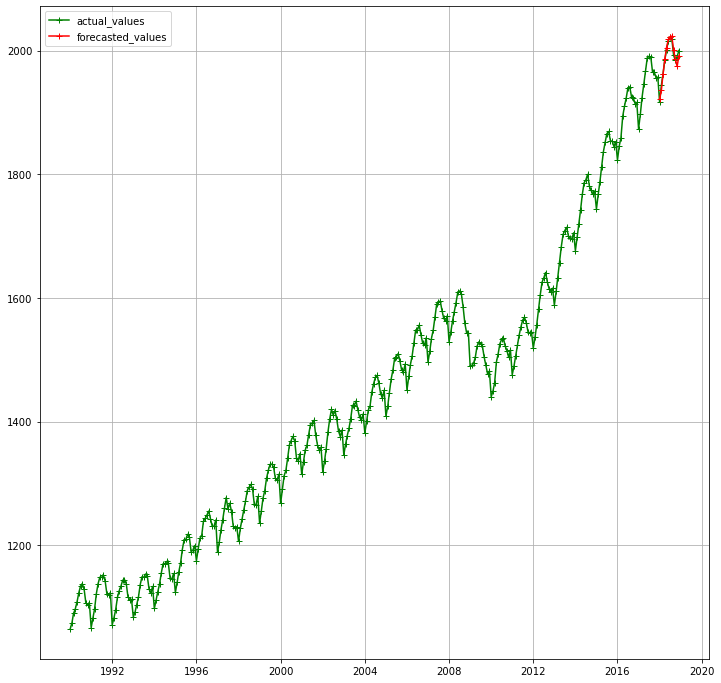

In [144]:
plt.figure(figsize=(12,12))
plt.plot(he,marker="+",color="g",label="actual_values")
plt.plot(pred_fur,color="r",label="forecasted_values",marker="+")
plt.legend()
plt.grid()